In [2]:
#사전 불러오기
import pickle
with open('../new_dic/new_dic.pkl', 'rb') as f:
    new_dic = pickle.load(f)

In [41]:
list(new_dic.keys())[:300]

["('하폭', 'NNG')",
 "('인하', 'NNG')",
 "('신년사', 'NNG')",
 "('GMAC', 'SL')",
 "('행지', 'NNG')",
 "('회사채', 'NNG')",
 "('AA', 'SL')",
 "('증권업협회', 'NNG')",
 "('EZ', 'SL')",
 "('DB', 'NNG')",
 "('Datastream', 'SL')",
 "('CDO', 'SL')",
 "('오토', 'NNG')",
 "('에퀴티', 'NNG')",
 "('Bloomberg', 'SL')",
 "('CP', 'NNG')",
 "('US', 'SL')",
 "('리보', 'NNG')",
 "('영국', 'NNG')",
 "('일비', 'NNG')",
 "('장기채권형', 'NNG')",
 "('특수채', 'NNG')",
 "('IRS', 'NNG')",
 "('엔달러', 'NNG')",
 "('IndexIndexIndex', 'SL')",
 "('Daewoo', 'SL'), ('Bond', 'SL')",
 "('금리', 'NNG'), ('하폭', 'NNG')",
 "('하폭', 'NNG'), ('더', 'MAG')",
 "('있', 'VV'), ('인하', 'NNG')",
 "('인하', 'NNG'), ('기조', 'NNG')",
 "('한국은행총재', 'NNG'), ('신년사', 'NNG')",
 "('신년사', 'NNG'), ('내년', 'NNG')",
 "('금리', 'NNG'), ('인하', 'NNG')",
 "('인하', 'NNG'), ('기대', 'NNG')",
 "('기대', 'NNG'), ('한은', 'NNG')",
 "('급락', 'NNG'), ('GMAC', 'SL')",
 "('행지', 'NNG'), ('주', 'NNG')",
 "('회사채', 'NNG'), ('AA', 'SL')",
 "('AA', 'SL'), ('금리', 'NNG')",
 "('자료', 'NNG'), ('증권업협회', 'NNG')",
 "('증권업협회',

In [3]:
#news_date_token불러오기

import pandas as pd
data = pd.read_csv('../minuets_ngram.csv', encoding='utf-8')

In [4]:
data.head()

,time,ngram
0,2009-04-23,"('가', 'VV')"
1,2009-04-23,"('의결', 'NNG')"
2,2009-04-23,"('안건', 'NNG')"
3,2009-04-23,"('의안', 'NNG')"
4,2009-04-23,"('공개시장조작', 'NNG')"


In [5]:
txt = data.copy()

In [6]:
txt.shape

(4149164, 2)

In [58]:
txt.head(30)

,time,ngram
0,2009-04-23,"('가', 'VV')"
1,2009-04-23,"('의결', 'NNG')"
2,2009-04-23,"('안건', 'NNG')"
3,2009-04-23,"('의안', 'NNG')"
4,2009-04-23,"('공개시장조작', 'NNG')"
5,2009-04-23,"('규정', 'NNG')"
6,2009-04-23,"('개정', 'NNG')"
7,2009-04-23,"('안', 'NNG')"
8,2009-04-23,"('금융시장', 'NNG')"
9,2009-04-23,"('국장', 'NNG')"


In [7]:
#세미콜론 ,로 바꾸기
txt['ngram'] = txt['ngram'].str.replace(';', ', ')

In [8]:
#각 text 토큰마다 사전 조회 후 사전에 해당 단어 있을 경우 count+1
import ast

def count_tags(row):
    hawkish_count = 0
    dovish_count = 0

    # 문자열로 저장된 튜플 리스트를 실제 리스트로 변환
    tuples = ast.literal_eval(row['ngram'])
    
    for t in tuples:
        tag = new_dic.get(str(t))
        if tag == 'hawkish':
            hawkish_count += 1
        elif tag == 'dovish':
            dovish_count += 1
        
    return pd.Series([hawkish_count, dovish_count])

txt[['hawkish_count', 'dovish_count']] = txt.apply(count_tags, axis=1)


In [9]:
txt.to_csv('./label_count.csv', index=False)

In [10]:
txt.head()

,time,ngram,hawkish_count,dovish_count
0,2009-04-23,"('가', 'VV')",0,0
1,2009-04-23,"('의결', 'NNG')",0,0
2,2009-04-23,"('안건', 'NNG')",0,0
3,2009-04-23,"('의안', 'NNG')",0,0
4,2009-04-23,"('공개시장조작', 'NNG')",0,0


In [46]:
txt.shape

(38731, 4)

In [11]:
txt['hawkish_count'].value_counts()

0    4090948
1      56149
2       1991
3         76
Name: hawkish_count, dtype: int64

In [12]:
txt['dovish_count'].value_counts()

0    3717240
1     383601
2      43896
3       4128
4        282
5         17
Name: dovish_count, dtype: int64

In [19]:
txt.dtypes

time             object
ngram            object
hawkish_count     int64
dovish_count      int64
dtype: object

In [27]:
#극성 count 둘 다 0인 행 제거
txt = txt[(txt['dovish_count'] != 0)|(txt['hawkish_count'] !=0)]

In [28]:
txt.dtypes

time              object
ngram             object
hawkish_count      int64
dovish_count       int64
tone             float64
dtype: object

In [29]:
#문장 tone 측정
txt['tone_s'] = (txt['hawkish_count'] - txt['dovish_count'])/(txt['hawkish_count']+txt['dovish_count'])

C:\Users\user\AppData\Local\Temp\ipykernel_11700\2356658953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt['tone_s'] = (txt['hawkish_count'] - txt['dovish_count'])/(txt['hawkish_count']+txt['dovish_count'])


In [33]:
txt = txt[['time', 'ngram', 'tone_s']]

In [44]:
txt

,time,ngram,tone_s
26,2009-04-23,"('의결', 'NNG'), ('안건', 'NNG')",-1.0
27,2009-04-23,"('안건', 'NNG'), ('의안', 'NNG')",-1.0
49,2009-04-23,"('가', 'VV'), ('의결', 'NNG'), ('안건', 'NNG')",-1.0
50,2009-04-23,"('의결', 'NNG'), ('안건', 'NNG'), ('의안', 'NNG')",-1.0
51,2009-04-23,"('안건', 'NNG'), ('의안', 'NNG'), ('공개시장조작', 'NNG')",-1.0
...,...,...,...
4148943,2021-04-15,"('기대', 'NNG'), ('상방', 'NNG'), ('요인', 'NNG'), (...",-1.0
4148944,2021-04-15,"('상방', 'NNG'), ('요인', 'NNG'), ('유럽', 'NNG'), (...",-1.0
4148945,2021-04-15,"('요인', 'NNG'), ('유럽', 'NNG'), ('코로나', 'NNG'), ...",-1.0
4148946,2021-04-15,"('유럽', 'NNG'), ('코로나', 'NNG'), ('확산', 'NNG'), ...",-1.0


In [48]:
#문장 tone에 따라 라벨링
txt['tone_label'] = txt['tone_s'].apply(lambda x: 'hawkish' if x > 0 else 'dovish')

C:\Users\user\AppData\Local\Temp\ipykernel_11700\4249305447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt['tone_label'] = txt['tone_s'].apply(lambda x: 'hawkish' if x > 0 else 'dovish')


In [58]:
#동일 날짜에 hawkish_label, dovish_label 카운트
hawkish_counts = txt.groupby('time').apply(lambda x: (x['tone_label'] == 'hawkish').sum())
dovish_counts = txt.groupby('time').apply(lambda x: (x['tone_label'] == 'dovish').sum())

result = txt.drop_duplicates(subset='time').set_index('time')
result['hawkish_count'] = hawkish_counts
result['dovish_count'] = dovish_counts
result = result.reset_index()

In [59]:
result

,time,ngram,tone_s,hawkish_sen,tone_label,hawkish_count,dovish_count
0,2009-04-23,"('의결', 'NNG'), ('안건', 'NNG')",-1.0,False,dovish,28,37
1,2009-04-30,"('의결', 'NNG'), ('안건', 'NNG')",-1.0,False,dovish,18,121
2,2009-05-12,"('의결', 'NNG'), ('안건', 'NNG')",-1.0,False,dovish,248,1311
3,2009-05-21,"('의결', 'NNG'), ('안건', 'NNG')",-1.0,False,dovish,0,68
4,2009-06-11,"('의결', 'NNG'), ('안건', 'NNG')",-1.0,False,dovish,236,1183
...,...,...,...,...,...,...,...
260,2021-01-28,"('의결', 'NNG'), ('안건', 'NNG')",-1.0,False,dovish,0,145
261,2021-02-25,"('의결', 'NNG'), ('안건', 'NNG')",-1.0,False,dovish,312,2904
262,2021-03-11,"('의결', 'NNG'), ('안건', 'NNG')",-1.0,False,dovish,62,287
263,2021-03-25,"('의결', 'NNG'), ('안건', 'NNG')",-1.0,False,dovish,71,983


In [60]:
#문장 tone 계산
result['doc_tone'] = (result['hawkish_count']-result['dovish_count'])/(result['hawkish_count']+result['dovish_count'])

In [65]:
result[result['doc_tone']>0].value_counts()

time        ngram                         tone_s  hawkish_sen  tone_label  hawkish_count  dovish_count  doc_tone
2013-02-28  ('의결', 'NNG'), ('안건', 'NNG')  -1.0    False        dovish      185            62            0.497976    1
dtype: int64

In [68]:
#최종 문서 tone 데이터프레임
result = result[['time', 'doc_tone']]

In [69]:
result

,time,doc_tone
0,2009-04-23,-0.138462
1,2009-04-30,-0.741007
2,2009-05-12,-0.681847
3,2009-05-21,-1.000000
4,2009-06-11,-0.667371
...,...,...
260,2021-01-28,-1.000000
261,2021-02-25,-0.805970
262,2021-03-11,-0.644699
263,2021-03-25,-0.865275


In [78]:
result.to_csv('./tone_by_nbc.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_11700\354091832.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result['doc_tone'], bins=50, kde=True, hist_kws={'edgecolor':'black'})


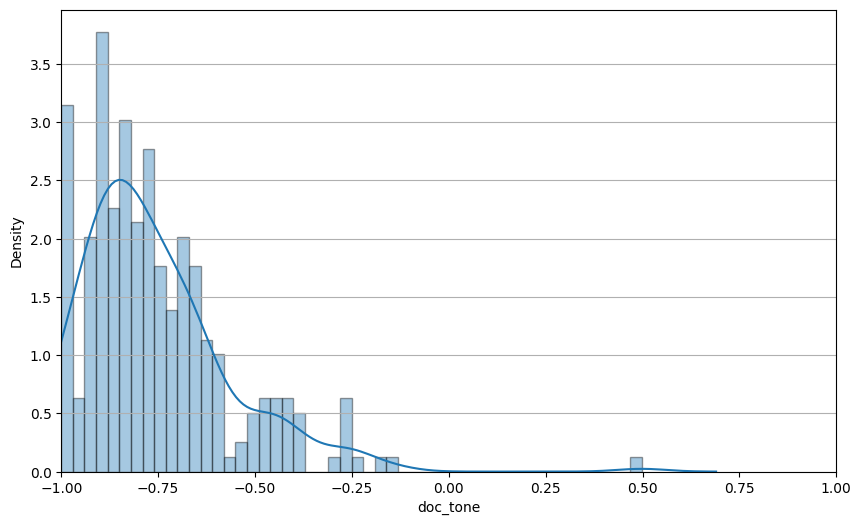

In [77]:
#문서 tone값 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.distplot(result['doc_tone'], bins=50, kde=True, hist_kws={'edgecolor':'black'})
plt.xlim(-1,1)
plt.grid(axis='y')
plt.show()
